In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. En el archivo <tt>titanic.csv</tt> encontrará una data sobre los pasajeros del Titanic. Cargue los datos en un `DataFrame`y realice gráficos que permitan visualizar las siguientes informaciones:
    1. Gráfico circular (*pie chart*) con los fallecidos y supervivientes.
    1. Histograma con las edades. 
    1. Diagrama de barras con el número de personas en cada clase. 
    1. Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

In [2]:
pd.set_option('display.max_rows', None) 
titanic = pd.read_csv('archivos/titanic.csv',sep=',')

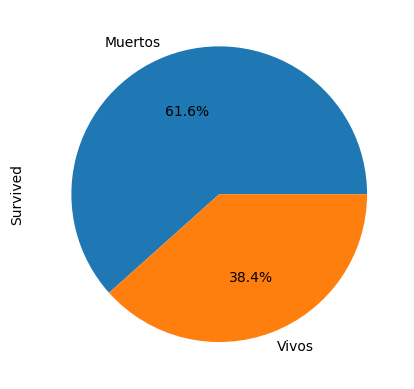

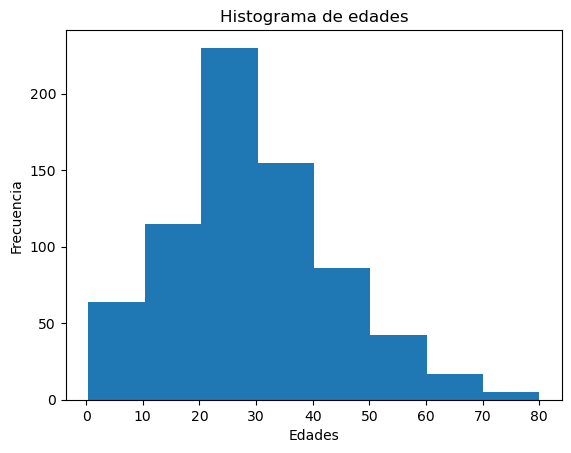

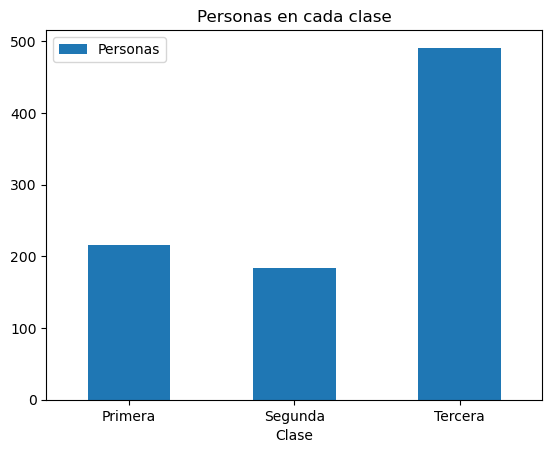

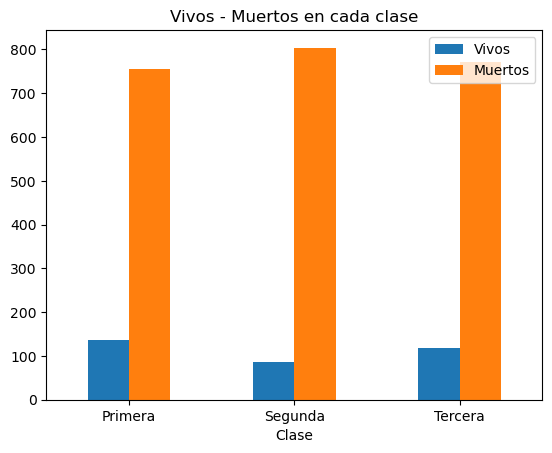

In [38]:



#condicion Pie Chart
condicionTorta = (titanic.Survived==1).value_counts() 

#Codicion num personas en cada clase
condicionPraClase = (titanic.Pclass==1).value_counts()
condicionSdaClase = (titanic.Pclass==2).value_counts()
condicionTraClase = (titanic.Pclass==3).value_counts()

#Condicion num personas vivas por clase
condicion1Vivos = ((titanic.Survived==1) & (titanic.Pclass==1)).value_counts()
condicion2Vivos = ((titanic.Survived==1) & (titanic.Pclass==2)).value_counts()
condicion3Vivos = ((titanic.Survived==1) & (titanic.Pclass==3)).value_counts()
condicion1Muertos = ((titanic.Survived==0) & (titanic.Pclass==1)).value_counts()
condicion2Muertos = ((titanic.Survived==0) & (titanic.Pclass==2)).value_counts()
condicion3Muertos = ((titanic.Survived==0) & (titanic.Pclass==3)).value_counts()

#Vector np para piechart
x = [condicionTorta.loc[True],condicionTorta.loc[False]]
labels = ['Muertos','Vivos']
condicionTorta.plot.pie(labels=labels, autopct='%1.1f%%')
plt.show()

#histograma
titanic.Age.plot.hist(bins=8)
plt.ylabel('Frecuencia')
plt.xlabel('Edades')
plt.title('Histograma de edades')
plt.show()

#diagrama de barras personas en cada clase
Personas = pd.DataFrame({'Personas':[condicionPraClase.loc[True],condicionSdaClase.loc[True],condicionTraClase.loc[True]],'Clase':['Primera','Segunda','Tercera']}, index=['Primera','Segunda','Tercera'])
Personas.plot.bar(x='Clase',y='Personas',rot=0)
plt.xlabel('Clase')
plt.title('Personas en cada clase')
plt.show()

#diagrama de barras vivos y muertos de cada clase
Sobrevivientes = pd.DataFrame({'Vivos':[condicion1Vivos.loc[True],condicion2Vivos.loc[True],condicion3Vivos.loc[True]],'Muertos':[condicion1Muertos.loc[True],condicion2Muertos.loc[True],condicion3Muertos.loc[True]]}, index=['Primera','Segunda','Tercera'])
Sobrevivientes.plot.bar(rot=0)
plt.xlabel('Clase')
plt.title('Vivos - Muertos en cada clase')
plt.show()

In [28]:
condicionPraClase

False    675
True     216
Name: Pclass, dtype: int64